# Проект2. Исследование объявлений о продаже квартир

## Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Описание данных

|признак|описание|
|---|---|
|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|
|balcony|число балконов|
|ceiling_height|высота потолков (м)|
|cityCenters_nearest|расстояние до центра города (м)|
|days_exposition|сколько дней было размещено объявление (от публикации до снятия)|
|first_day_exposition|дата публикации|
|floor|этаж|
|floors_total|всего этажей в доме|
|is_apartment|апартаменты (булев тип)|
|kitchen_area|площадь кухни в квадратных метрах (м²)|
|last_price|цена на момент снятия с публикации|
|living_area|жилая площадь в квадратных метрах(м²)|
|locality_name|название населённого пункта|
|open_plan|свободная планировка (булев тип)|
|parks_around3000|число парков в радиусе 3 км|
|parks_nearest|расстояние до ближайшего парка (м)|
|ponds_around3000|число водоёмов в радиусе 3 км|
|ponds_nearest|расстояние до ближайшего водоёма (м)|
|rooms|число комнат|
|studio|квартира-студия (булев тип)|
|total_area|площадь квартиры в квадратных метрах (м²)|
|total_images|число фотографий квартиры в объявлении|

1. [Откройте файл с данными и изучите общую информацию](#1)
    1.1. [Определите и изучите пропущенные значения](#1.1)
    1.2. [Приведите данные к нужным типам](#1.2)
3. [Посчитайте и добавьте в таблицу признаки](#2)
4. [Проведите исследовательский анализ данных и выполните инструкции](#3)

    4.1. [Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?](#3.1)
    
    4.2. [Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.](#3.2)
    
    4.3. [Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.](#3.3)   
    
    4.4. [Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.](#4.4)
    
    4.5. [Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?](#4.5)
    
    4.6. [Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.](#4.6)
            
    4.7. [Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?](#4.7)

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip install collections
# !pip install seaborn
# !pip install tqdm
# !pip install datetime

import seaborn as sns
from tqdm import tqdm_notebook
from collections import defaultdict
from datetime import datetime

In [3]:
df = pd.read_csv('datasets/real_estate_data.csv', sep = '\t')

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### _переименуем название колонок_

In [6]:
names_dict = {'airports_nearest' : 'расстояние до ближайшего аэропорта в метрах (м)',
              'balcony' : 'число балконов',
              'ceiling_height' : 'высота потолков (м)',
              'cityCenters_nearest' : 'расстояние до центра города (м)',
              'days_exposition' : 'сколько дней было размещено объявление (от публикации до снятия)',
              'first_day_exposition' : 'дата публикации',
              'floor' : 'этаж',
              'floors_total' : 'всего этажей в доме',
              'is_apartment' : 'апартаменты (булев тип)',
              'kitchen_area' : 'площадь кухни в квадратных метрах (м²)',
              'last_price' : 'цена на момент снятия с публикации',
              'living_area' : 'жилая площадь в квадратных метрах(м²)',
              'locality_name' : 'название населённого пункта',
              'open_plan' : 'свободная планировка (булев тип)',
              'parks_around3000' : 'число парков в радиусе 3 км',
              'parks_nearest' : 'расстояние до ближайшего парка (м)',
              'ponds_around3000' : 'число водоёмов в радиусе 3 км',
              'ponds_nearest' : 'расстояние до ближайшего водоёма (м)',
              'rooms' : 'число комнат',
              'studio' : 'квартира-студия (булев тип)',
              'total_area' : 'площадь квартиры в квадратных метрах (м²)',
              'total_images' : 'число фотографий квартиры в объявлении'}

df = df.rename(columns = names_dict)

#### Шаг 1.1 Определите и изучите пропущенные значения

#### _описательные статистики_

In [7]:
def _get_report(df):    
    table_report = df.agg({'min', 'max'}).T
    table_report['nunique'] = df.nunique()
    table_report.columns = ['минимум', 'маскимум', 'число уникальных значений']
    table_report['% пропусков'] = df.isna().mean().round(2).mul(100).astype(int)
    return table_report.sort_values('% пропусков', ascending = False)

def _get_value_counts(series):
    return series.value_counts().sort_index()

def _get_correlations(df, col):
    return df.corrwith(df[col]).abs().sort_values(ascending = False)[1:]

In [8]:
_get_report(df)

,минимум,маскимум,число уникальных значений,% пропусков
апартаменты (булев тип),False,True,2,88
расстояние до ближайшего парка (м),1,3190,995,66
расстояние до ближайшего водоёма (м),13,1344,1096,62
число балконов,0,5,6,49
высота потолков (м),1,100,183,39
число водоёмов в радиусе 3 км,0,3,4,23
число парков в радиусе 3 км,0,3,4,23
расстояние до центра города (м),181,65968,7642,23
расстояние до ближайшего аэропорта в метрах (м),0,84869,8275,23
сколько дней было размещено объявление (от публикации до снятия),1,1580,1141,13


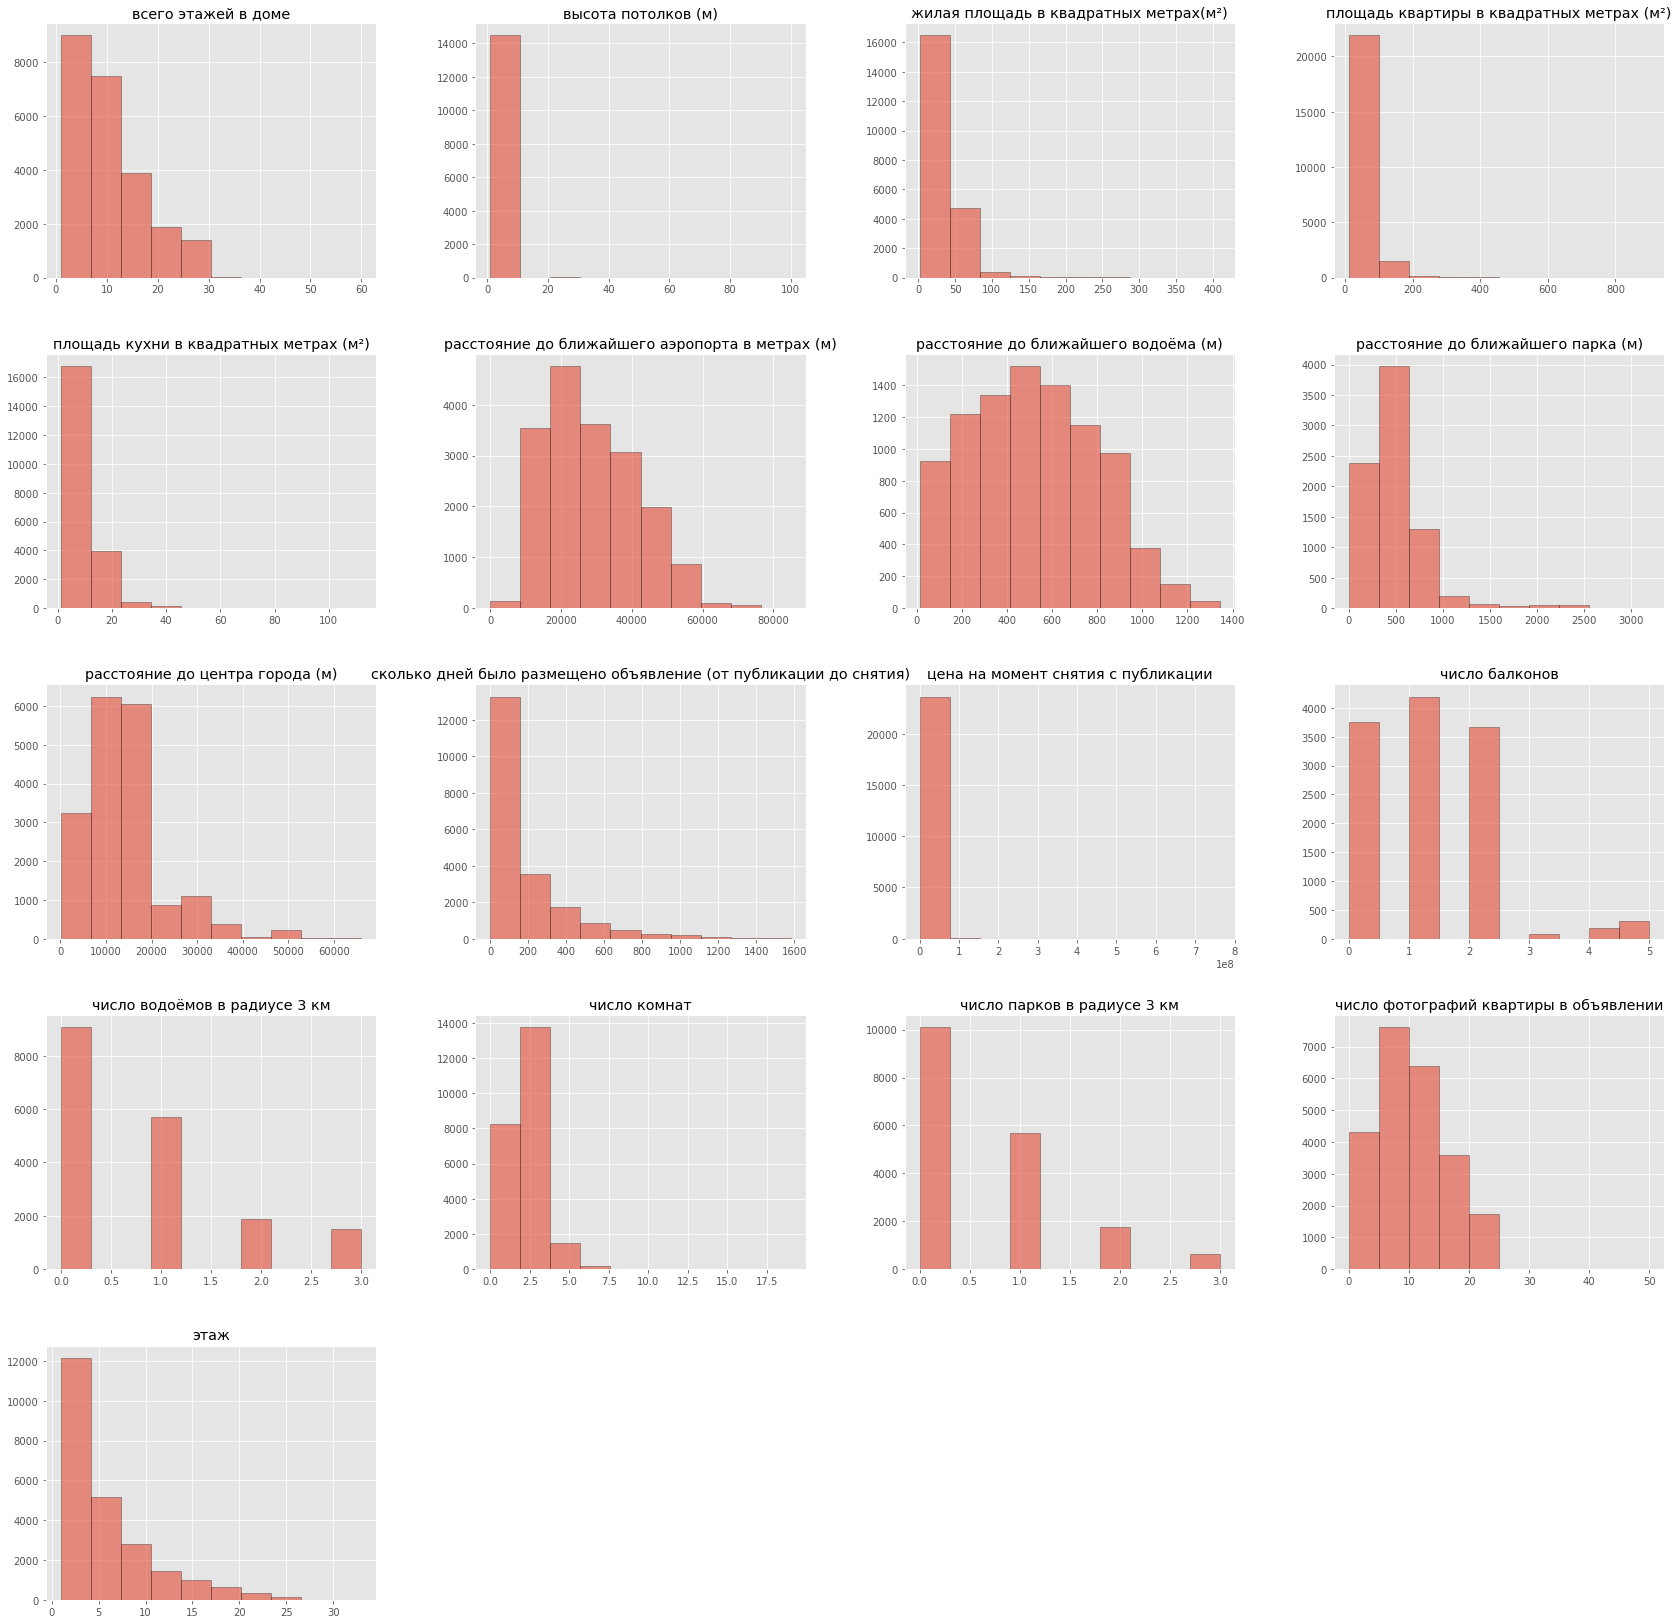

In [9]:
df.select_dtypes('number').hist(figsize = (29, 29), alpha = .6, edgecolor = 'black')
plt.show()

#### _преобразуем типы, где возможно_

In [10]:
def _convert_types(df, print_report = True):
    df_c = df.copy()
    # проходим по каждой колонке
    for col in df_c.columns:
        try:
            # меняем тип на дату
            df_c[col] = df_c[col].astype('datetime64')
        except:            
            try:
                # приводим к инту, если возможно
                _val = df_c[col]
                _val_int = _val.astype(np.int32)
                if (_val == _val_int).all():
                    df_c[col] = df_c[col].astype('int')
                else:
                    df_c[col] = df_c[col].astype('float')
            except:
                try:
                    # bool --> float
                    df_c[col] = df_c[col].astype('float')
                except:
                    # удаляем пропуски, приводим к нижнему регистру
                    df_c[col] = df_c[col].str.lower().str.strip()
    if print_report:
        print('Отчет по типам данных\n-------------------------')
        D_types = defaultdict(list)
        for k, v in df_c.dtypes.items():
            D_types[v].append(k)

        for k, v in D_types.items():
            print('Тип == {}. Колонки:\n'.format(k))
            for i, column in enumerate(v):
                print('\t{}) {}'.format(i+1, column))
            print('-------------------------')
    
    return df_c

In [11]:
df = _convert_types(df, True)

Отчет по типам данных
-------------------------
Тип == int32. Колонки:

	1) число фотографий квартиры в объявлении
	2) цена на момент снятия с публикации
	3) число комнат
	4) этаж
	5) квартира-студия (булев тип)
	6) свободная планировка (булев тип)
-------------------------
Тип == float64. Колонки:

	1) площадь квартиры в квадратных метрах (м²)
	2) высота потолков (м)
	3) всего этажей в доме
	4) жилая площадь в квадратных метрах(м²)
	5) апартаменты (булев тип)
	6) площадь кухни в квадратных метрах (м²)
	7) число балконов
	8) расстояние до ближайшего аэропорта в метрах (м)
	9) расстояние до центра города (м)
	10) число парков в радиусе 3 км
	11) расстояние до ближайшего парка (м)
	12) число водоёмов в радиусе 3 км
	13) расстояние до ближайшего водоёма (м)
	14) сколько дней было размещено объявление (от публикации до снятия)
-------------------------
Тип == datetime64[ns]. Колонки:

	1) дата публикации
-------------------------
Тип == object. Колонки:

	1) название населённого пункта
---

#### _работаем с выбросами_

In [12]:
df.columns

Index(['число фотографий квартиры в объявлении',
       'цена на момент снятия с публикации',
       'площадь квартиры в квадратных метрах (м²)', 'дата публикации',
       'число комнат', 'высота потолков (м)', 'всего этажей в доме',
       'жилая площадь в квадратных метрах(м²)', 'этаж',
       'апартаменты (булев тип)', 'квартира-студия (булев тип)',
       'свободная планировка (булев тип)',
       'площадь кухни в квадратных метрах (м²)', 'число балконов',
       'название населённого пункта',
       'расстояние до ближайшего аэропорта в метрах (м)',
       'расстояние до центра города (м)', 'число парков в радиусе 3 км',
       'расстояние до ближайшего парка (м)', 'число водоёмов в радиусе 3 км',
       'расстояние до ближайшего водоёма (м)',
       'сколько дней было размещено объявление (от публикации до снятия)'],
      dtype='object')

In [13]:
_get_report(df)

,минимум,маскимум,число уникальных значений,% пропусков
апартаменты (булев тип),0,1,2,88
расстояние до ближайшего парка (м),1,3190,995,66
расстояние до ближайшего водоёма (м),13,1344,1096,62
число балконов,0,5,6,49
высота потолков (м),1,100,183,39
число водоёмов в радиусе 3 км,0,3,4,23
число парков в радиусе 3 км,0,3,4,23
расстояние до центра города (м),181,65968,7642,23
расстояние до ближайшего аэропорта в метрах (м),0,84869,8275,23
сколько дней было размещено объявление (от публикации до снятия),1,1580,1141,13


##### высота потолков (м)(исправим, где допущена ошибка в масштабе)


In [14]:
_get_value_counts(df['высота потолков (м)'].round())

1.0          2
2.0       3586
3.0      10482
4.0        392
5.0          9
6.0          4
8.0          4
10.0         1
14.0         1
20.0         1
23.0         1
24.0         1
25.0         7
26.0         1
27.0         8
28.0         1
32.0         2
100.0        1
Name: высота потолков (м), dtype: int64

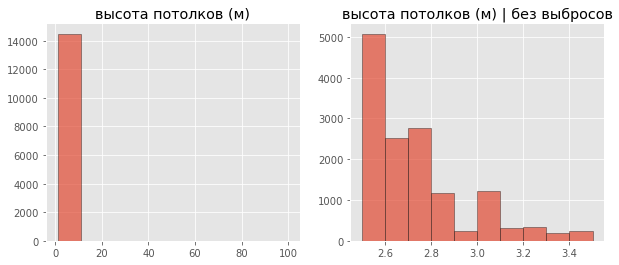

In [15]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
df['высота потолков (м)'].hist(edgecolor = 'black', alpha = .7)
plt.title('высота потолков (м)')

plt.subplot(1, 2, 2)
outlier_mask = ~df['высота потолков (м)'].between(df['высота потолков (м)'].quantile(.025),\
                                                 df['высота потолков (м)'].quantile(.975))
df['высота потолков (м)'][~outlier_mask]\
    .hist(edgecolor = 'black', alpha = .7)
plt.title('высота потолков (м) | без выбросов')
plt.show()

In [16]:
mn, mx = df['высота потолков (м)'][~outlier_mask].agg({'min', 'max'})

df.loc[df['высота потолков (м)'].round() == 1, 'высота потолков (м)']  = mn           
df.loc[df['высота потолков (м)'].round() >20, 'высота потолков (м)']\
    =  df[df['высота потолков (м)'].round()>20]['высота потолков (м)'] / 10


#### _апартаменты (булев тип)_

In [17]:
prices_apartments = np.array([df.loc[df['апартаменты (булев тип)'] == 0].mean()['цена на момент снятия с публикации'],\
                              df.loc[df['апартаменты (булев тип)'] == 1].mean()['цена на момент снятия с публикации']])
na_prices = df.loc[df['апартаменты (булев тип)'].isna()].mean()['цена на момент снятия с публикации']

In [18]:
df.loc[df['апартаменты (булев тип)'].isna(),'апартаменты (булев тип)'] = np.argmin(np.abs(prices_apartments - na_prices))

In [19]:
df['апартаменты (булев тип)'].value_counts()

0.0    23649
1.0       50
Name: апартаменты (булев тип), dtype: int64

#### _расстояние до ближайшего парка (м), расстояние до ближайшего водоёма (м)_


In [20]:
_get_correlations(df, 'расстояние до ближайшего парка (м)')

число парков в радиусе 3 км                                         0.259514
всего этажей в доме                                                 0.097527
число водоёмов в радиусе 3 км                                       0.077280
этаж                                                                0.073045
расстояние до ближайшего аэропорта в метрах (м)                     0.070058
число комнат                                                        0.054549
число балконов                                                      0.052328
жилая площадь в квадратных метрах(м²)                               0.050167
расстояние до центра города (м)                                     0.040650
высота потолков (м)                                                 0.035132
апартаменты (булев тип)                                             0.033410
площадь кухни в квадратных метрах (м²)                              0.029641
сколько дней было размещено объявление (от публикации до снятия)    0.023254

In [21]:
_get_correlations(df, 'расстояние до ближайшего водоёма (м)')

число водоёмов в радиусе 3 км                                       0.341840
число парков в радиусе 3 км                                         0.167103
высота потолков (м)                                                 0.132542
площадь кухни в квадратных метрах (м²)                              0.105223
площадь квартиры в квадратных метрах (м²)                           0.097969
цена на момент снятия с публикации                                  0.084809
жилая площадь в квадратных метрах(м²)                               0.081674
сколько дней было размещено объявление (от публикации до снятия)    0.077879
число комнат                                                        0.057689
всего этажей в доме                                                 0.038864
расстояние до центра города (м)                                     0.028903
этаж                                                                0.024850
расстояние до ближайшего аэропорта в метрах (м)                     0.014049

In [22]:
bys = ['число парков в радиусе 3 км', 'число водоёмов в радиусе 3 км']
keys = ['расстояние до ближайшего парка (м)', 'расстояние до ближайшего водоёма (м)']

In [23]:
for by, key in zip(bys, keys):
    _dists_to_park_by_n_parks = df.groupby(by)[key].mean()
    for i in tqdm_notebook(df[df[key].isna()].index):
        row = df.loc[i]
        try:
            df.loc[i, key] = _dists_to_park_by_n_parks[row[by]]
        except:
            df.loc[i, key] = np.nan

#### _число балконов(если значение отсутствует, то балкона нет)_

In [24]:
_get_value_counts(df['число балконов'].fillna(-1))

-1.0    11519
 0.0     3758
 1.0     4195
 2.0     3659
 3.0       81
 4.0      183
 5.0      304
Name: число балконов, dtype: int64

In [25]:
df['число балконов'].fillna(0, inplace = True)

#### _высота потолков (м). заполним пропуски высотой потолоков в квартирах той же площади_

In [26]:
_get_correlations(df, 'высота потолков (м)')

площадь квартиры в квадратных метрах (м²)                           0.383147
жилая площадь в квадратных метрах(м²)                               0.360098
площадь кухни в квадратных метрах (м²)                              0.335776
цена на момент снятия с публикации                                  0.317419
расстояние до центра города (м)                                     0.287547
число комнат                                                        0.233997
число парков в радиусе 3 км                                         0.215828
число водоёмов в радиусе 3 км                                       0.184897
расстояние до ближайшего парка (м)                                  0.171071
расстояние до ближайшего водоёма (м)                                0.132542
сколько дней было размещено объявление (от публикации до снятия)    0.112532
расстояние до ближайшего аэропорта в метрах (м)                     0.088476
апартаменты (булев тип)                                             0.077899

In [27]:
for i in tqdm_notebook(df[df['высота потолков (м)'].isna()].index):
    row = df.loc[i]
    df.loc[i,'высота потолков (м)'] =  df[df['площадь квартиры в квадратных метрах (м²)'] // 10\
                                              == row['площадь квартиры в квадратных метрах (м²)'] // 10]\
                                        ['высота потолков (м)'].mean()

In [28]:
df['высота потолков (м)'].fillna(df['высота потолков (м)'].median(), inplace = True)

#### _число водоёмов в радиусе 3 км, число парков в радиусе 3 км. заполняем пропуски нулем_

In [29]:
df['число водоёмов в радиусе 3 км'] = df['число водоёмов в радиусе 3 км'].fillna(0)
df['число парков в радиусе 3 км'] = df['число парков в радиусе 3 км'].fillna(0)

In [30]:
df[df['число водоёмов в радиусе 3 км']==0]['расстояние до ближайшего водоёма (м)'].isna().all()  &\
    df[df['число парков в радиусе 3 км']==0]['расстояние до ближайшего парка (м)'].isna().all()

False

#### _расстояние до центра города (м): все такие места - поселки, пригороды. заполним пропуски квантилем .9 для расстояния_

In [31]:
_get_correlations(df, 'расстояние до центра города (м)')

расстояние до ближайшего аэропорта в метрах (м)                     0.272184
высота потолков (м)                                                 0.262838
площадь квартиры в квадратных метрах (м²)                           0.231446
жилая площадь в квадратных метрах(м²)                               0.231368
цена на момент снятия с публикации                                  0.206747
площадь кухни в квадратных метрах (м²)                              0.190049
число комнат                                                        0.184864
расстояние до ближайшего парка (м)                                  0.180415
число парков в радиусе 3 км                                         0.161738
число водоёмов в радиусе 3 км                                       0.074577
число балконов                                                      0.065050
сколько дней было размещено объявление (от публикации до снятия)    0.060714
число фотографий квартиры в объявлении                              0.047666

In [32]:
top5_places_no_dists_to_center = df[df['расстояние до центра города (м)'].isna()]['название населённого пункта'].value_counts().head()
top5_places_no_dists_to_center     

посёлок мурино     522
всеволожск         398
гатчина            307
деревня кудрово    299
выборг             237
Name: название населённого пункта, dtype: int64

In [33]:
df['расстояние до центра города (м)'].fillna(df[~df['название населённого пункта'].isin(top5_places_no_dists_to_center.index)]\
                                                ['расстояние до центра города (м)'].quantile(.9), inplace = True)

#### _расстояние до ближайшего аэропорта в метрах (м) заполняем в соответствии с расстоянием до центра города и высотой дома_

In [34]:
_get_correlations(df, 'расстояние до ближайшего аэропорта в метрах (м)')

расстояние до центра города (м)                                     0.272083
всего этажей в доме                                                 0.108288
высота потолков (м)                                                 0.074030
этаж                                                                0.071597
число комнат                                                        0.061199
жилая площадь в квадратных метрах(м²)                               0.057912
число водоёмов в радиусе 3 км                                       0.049583
число балконов                                                      0.048984
площадь квартиры в квадратных метрах (м²)                           0.030753
цена на момент снятия с публикации                                  0.026239
квартира-студия (булев тип)                                         0.021876
сколько дней было размещено объявление (от публикации до снятия)    0.018271
апартаменты (булев тип)                                             0.016470

In [35]:
_df = df.copy()
for i in tqdm_notebook(df[df['расстояние до ближайшего аэропорта в метрах (м)'].isna()].index):
    row = df.loc[i]
    _df.loc[i,'расстояние до ближайшего аэропорта в метрах (м)'] = df[\
                                                                      ((df['расстояние до центра города (м)'] // 1e3\
                                                                        == row['расстояние до центра города (м)'] // 1e3) &\
                                                                       (df['всего этажей в доме'] == row['всего этажей в доме'])\
                                                                      )]\
                                                                    ['расстояние до ближайшего аэропорта в метрах (м)'].mean()

#### _сколько дней было размещено объявление (от публикации до снятия). заполняем по площади квартиры_

In [36]:
_get_correlations(df, 'сколько дней было размещено объявление (от публикации до снятия)')

площадь квартиры в квадратных метрах (м²)          0.149675
жилая площадь в квадратных метрах(м²)              0.142454
число комнат                                       0.126961
высота потолков (м)                                0.110602
площадь кухни в квадратных метрах (м²)             0.100586
цена на момент снятия с публикации                 0.081146
расстояние до ближайшего водоёма (м)               0.077879
число водоёмов в радиусе 3 км                      0.066289
число парков в радиусе 3 км                        0.055867
расстояние до центра города (м)                    0.053523
всего этажей в доме                                0.052234
расстояние до ближайшего парка (м)                 0.042790
этаж                                               0.039463
число балконов                                     0.027834
число фотографий квартиры в объявлении             0.026657
свободная планировка (булев тип)                   0.024112
квартира-студия (булев тип)             

In [37]:
for i in tqdm_notebook(df[df['сколько дней было размещено объявление (от публикации до снятия)'].isna()].index):
    row = df.loc[i]
    df.loc[i, 'сколько дней было размещено объявление (от публикации до снятия)']\
        = df[df['площадь квартиры в квадратных метрах (м²)'] // 10 == row['площадь квартиры в квадратных метрах (м²)'] // 10]\
        ['сколько дней было размещено объявление (от публикации до снятия)'].median()

In [38]:
df['сколько дней было размещено объявление (от публикации до снятия)']\
    .fillna(df['сколько дней было размещено объявление (от публикации до снятия)'].quantile(.9), inplace = True)

#### _площадь кухни в квадратных метрах (м²), жилая площадь в квадратных метрах(м²). заполняем по площади квартиры_

In [39]:
_get_correlations(df, 'площадь кухни в квадратных метрах (м²)')

площадь квартиры в квадратных метрах (м²)                           0.609121
цена на момент снятия с публикации                                  0.519869
жилая площадь в квадратных метрах(м²)                               0.428674
высота потолков (м)                                                 0.360572
число комнат                                                        0.269945
расстояние до центра города (м)                                     0.216090
число водоёмов в радиусе 3 км                                       0.175719
всего этажей в доме                                                 0.163944
этаж                                                                0.135531
число парков в радиусе 3 км                                         0.118586
расстояние до ближайшего водоёма (м)                                0.105223
число фотографий квартиры в объявлении                              0.104756
сколько дней было размещено объявление (от публикации до снятия)    0.101656

In [40]:
for key in tqdm_notebook(['площадь кухни в квадратных метрах (м²)', 'жилая площадь в квадратных метрах(м²)']):
    for i in tqdm_notebook(df[df[key].isna()].index):
        row = df.loc[i]
        df.loc[i, key] = \
            df[df['площадь квартиры в квадратных метрах (м²)'] // 10\
                == row['площадь квартиры в квадратных метрах (м²)'] // 10]\
              [key].mean()

In [41]:
df['площадь кухни в квадратных метрах (м²)'].fillna(df['площадь кухни в квадратных метрах (м²)'].median(), inplace = True)
df['жилая площадь в квадратных метрах(м²)'].fillna(df['жилая площадь в квадратных метрах(м²)'].median(), inplace = True)

In [42]:
_get_report(df)

,минимум,маскимум,число уникальных значений,% пропусков
расстояние до ближайшего водоёма (м),13,1344,1096,62
расстояние до ближайшего парка (м),1,3190,996,23
расстояние до ближайшего аэропорта в метрах (м),0,84869,8275,23
число фотографий квартиры в объявлении,0,50,38,0
свободная планировка (булев тип),0,1,2,0
число водоёмов в радиусе 3 км,0,3,4,0
число парков в радиусе 3 км,0,3,4,0
расстояние до центра города (м),181,65968,7643,0
число балконов,0,5,6,0
площадь кухни в квадратных метрах (м²),1.3,112,1217,0


#### Шаг 1.2 Приведите данные к нужным типам
* _даты к типу datetime_
* _числа - к инту, по возможности_
* _строки приводим к нижнему регистру и убираем пропуски_


In [43]:
df_c = df.copy()
df_c = _convert_types(df_c, True)

df = df_c
del df_c

Отчет по типам данных
-------------------------
Тип == int32. Колонки:

	1) число фотографий квартиры в объявлении
	2) цена на момент снятия с публикации
	3) число комнат
	4) этаж
	5) апартаменты (булев тип)
	6) квартира-студия (булев тип)
	7) свободная планировка (булев тип)
	8) число балконов
	9) число парков в радиусе 3 км
	10) число водоёмов в радиусе 3 км
-------------------------
Тип == float64. Колонки:

	1) площадь квартиры в квадратных метрах (м²)
	2) высота потолков (м)
	3) всего этажей в доме
	4) жилая площадь в квадратных метрах(м²)
	5) площадь кухни в квадратных метрах (м²)
	6) расстояние до ближайшего аэропорта в метрах (м)
	7) расстояние до центра города (м)
	8) расстояние до ближайшего парка (м)
	9) расстояние до ближайшего водоёма (м)
	10) сколько дней было размещено объявление (от публикации до снятия)
-------------------------
Тип == datetime64[ns]. Колонки:

	1) дата публикации
-------------------------
Тип == object. Колонки:

	1) название населённого пункта
------

### Шаг 3. Посчитайте и добавьте в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [44]:
df['цена квадратного метра'] = df['цена на момент снятия с публикации'] / df['жилая площадь в квадратных метрах(м²)'] 
df['год публикации'] = df['дата публикации'].dt.month
df['месяц публикации'] = df['дата публикации'].dt.month
df['день недели публикации'] = df['дата публикации'].dt.dayofweek
df['площадь кухни / общая площадь'] = df['площадь кухни в квадратных метрах (м²)'] / df['площадь квартиры в квадратных метрах (м²)']
df['жилая площадь  / общая площадь'] = df['жилая площадь в квадратных метрах(м²)'] / df['площадь квартиры в квадратных метрах (м²)']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:


#### Шаг 4.1 Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
* цены, площади, высоты потолокв распрелделены логнормально (это логично, с ростом значений данные параметры становятся более редкими )
* квартиры с ростом числа комнат также становятся более редкими (тут, скорее всего, первичным фактором является площадь)

In [45]:
def _plot_histogram(df, col, **kwargs):
    series = df[col]
    series_cut = series[series.between(series.quantile(.025), series.quantile(.975))]
    series_cut.hist(edgecolor = 'black', alpha = .7, **kwargs)
    plt.title(col)

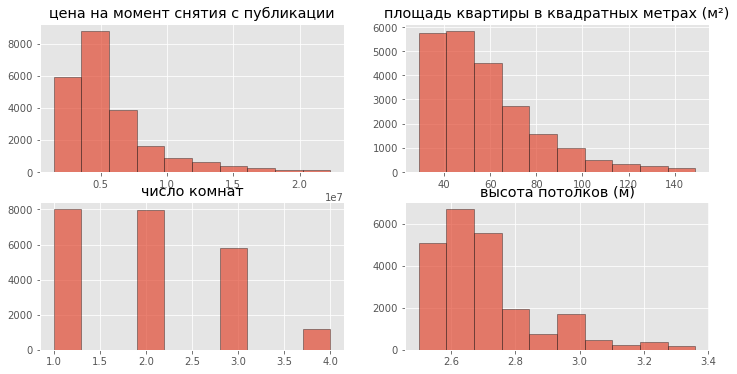

In [46]:
to_plot = ['цена на момент снятия с публикации',
       'площадь квартиры в квадратных метрах (м²)', 'число комнат', 'высота потолков (м)']
ncols = 2
nrows = np.int32(np.ceil(len(to_plot) / ncols))

for i, col in enumerate(to_plot):
    plt.subplot(nrows, ncols, i+1)
    _plot_histogram(df, col, figsize = (12, 6))
    

#### Шаг 4.2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* топ быстрых сделок - 10% самых быстрых сделок, около 21.0 дней. Сделки, прошедшие быстрее, можно считать быстрыми
* топ долгих сделок - 5% самых долгих сделок, около 59.0 дней. Сделки, прошедшие дольше, можно считать долгими

In [47]:
# дней со дня публикации
df['дней со дня публикации'] = (datetime.now() - df['дата публикации']) // np.timedelta64(30, 'D')



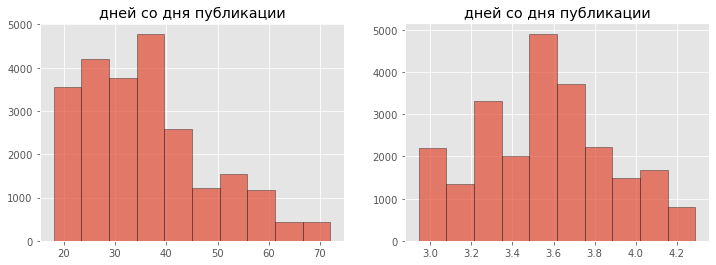

In [48]:
plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
df['дней со дня публикации'].hist(edgecolor= 'black', alpha = .7)
plt.title('дней со дня публикации')
plt.subplot(1, 2, 2)
df['дней со дня публикации'].apply(np.log1p).hist(edgecolor ='black', alpha = .7)
plt.title('дней со дня публикации')
plt.show()

In [49]:
too_short = df['дней со дня публикации'].quantile(.1)
too_long = df['дней со дня публикации'].quantile(.95)
med = df['дней со дня публикации'].median()
mean = df['дней со дня публикации'].mean()

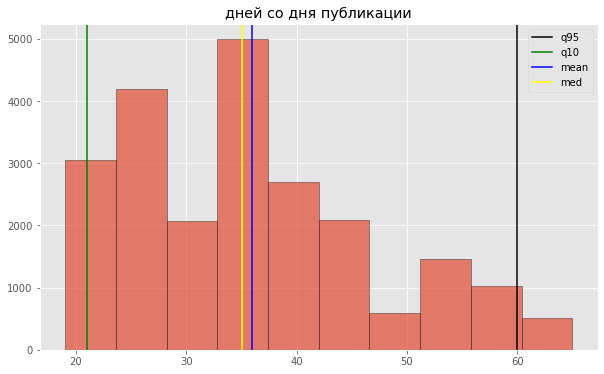

In [50]:
_plot_histogram(df, 'дней со дня публикации', figsize = (10, 6))
plt.axvline(too_long, c='black')
plt.axvline(too_short, c ='green')
plt.axvline(mean, c = 'blue')
plt.axvline(med, c = 'yellow')
plt.legend(['q95', 'q10', 'mean', 'med'])
plt.show()

In [51]:
print('топ быстрых сделок - 10% самых быстрых сделок, около {} дней'.format(too_short))
print('топ долгих сделок - 5% самых долгих сделок, около {} дней '.format(too_long))


топ быстрых сделок - 10% самых быстрых сделок, около 21.0 дней
топ долгих сделок - 5% самых долгих сделок, около 60.0 дней 


#### Шаг 4.3 Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
* убираем выбросы с помощью интерквартильного размаха
* цены и площади распределены логнормально
* выбросы-это не ошибки в данных, а аномалии, их не стоит использовать в поиске общих тенденций, но стоит принимать во внимание при исследовании аномальных характеристик датасета

In [52]:
def _mark_outliers_iqr(ser):    
    Q1 = ser.quantile(0.25)
    Q3 = ser.quantile(0.75)
    IQR = Q3 - Q1
    return (ser < (Q1 - 1.5 * IQR)) | (ser > (Q3 + 1.5 * IQR))

In [53]:
df_no_outliers = df.loc[~df.select_dtypes('number').apply(_mark_outliers_iqr).any(1)]

------------------цена на момент снятия с публикации------------------


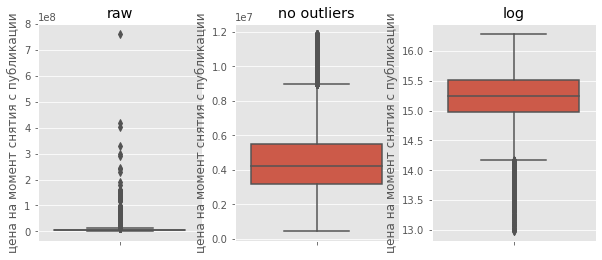

------------------площадь квартиры в квадратных метрах (м²)------------------


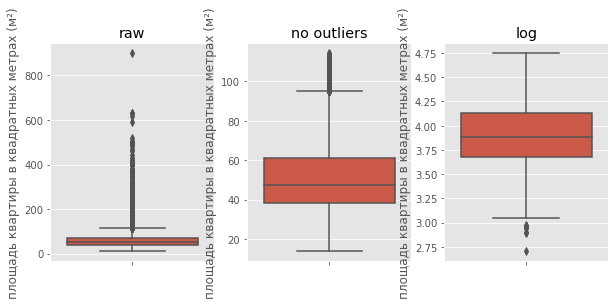

------------------высота потолков (м)------------------


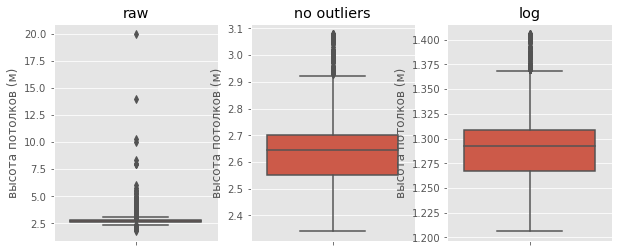

------------------жилая площадь в квадратных метрах(м²)------------------


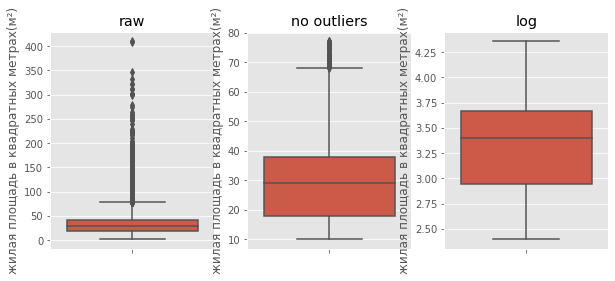

------------------площадь кухни в квадратных метрах (м²)------------------


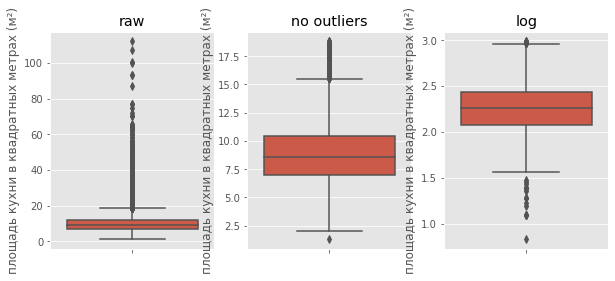

------------------расстояние до ближайшего аэропорта в метрах (м)------------------


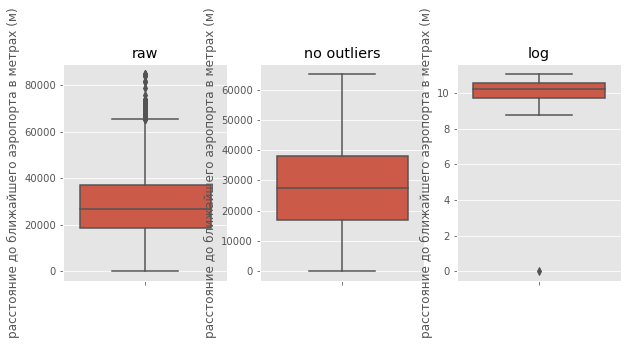

------------------расстояние до центра города (м)------------------


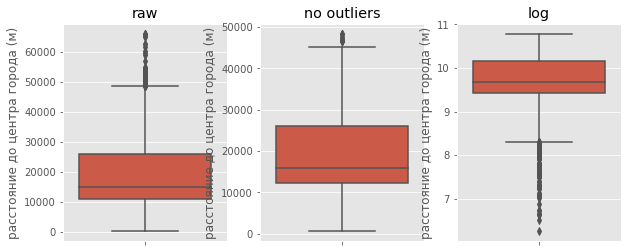

------------------расстояние до ближайшего водоёма (м)------------------


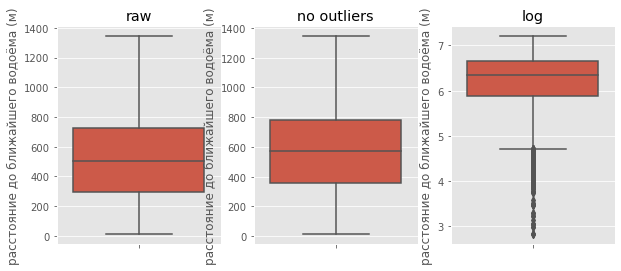

------------------сколько дней было размещено объявление (от публикации до снятия)------------------


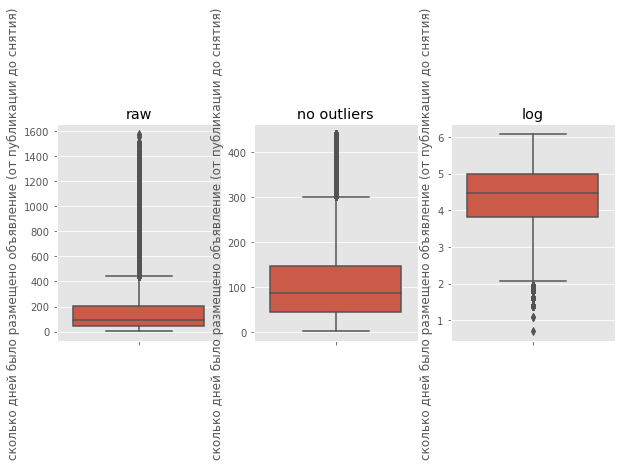

------------------цена квадратного метра------------------


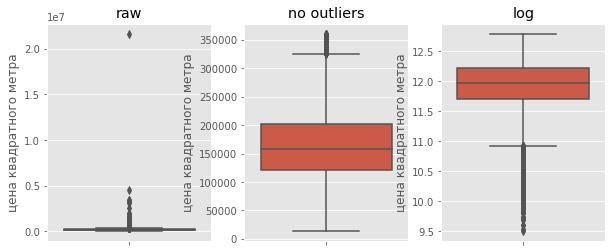

------------------площадь кухни / общая площадь------------------


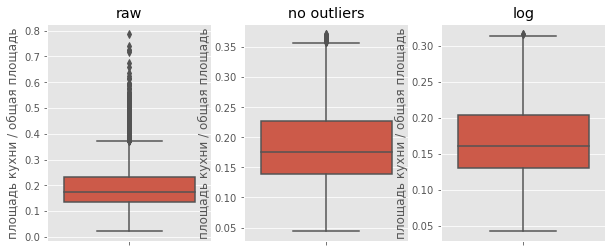

------------------жилая площадь  / общая площадь------------------


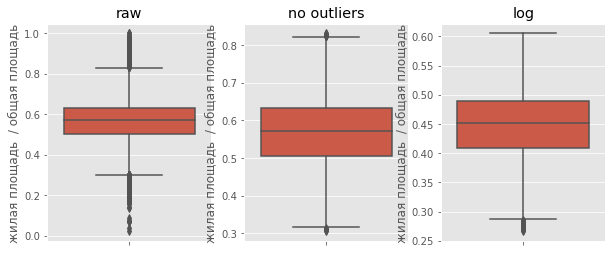

In [54]:
df_num = df.select_dtypes('number')

for col in df_num.nunique()[df_num.nunique() > 1000].index:
    print('------------------{}------------------'.format(col))
    
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 3, 1)
    sns.boxplot(df[col], orient = 'v')
    plt.title('raw')
    
    plt.subplot(1, 3, 2)
    sns.boxplot(df_no_outliers[col], orient = 'v')
    plt.title('no outliers')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(df_no_outliers[col].apply(np.log1p), orient = 'v')
    plt.title('log')
    plt.show()

#### Шаг 4.4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
* с ростом площади и числа комнат стоиомсть квартир растет
* с падением расстрояния до центра - падает
* с течением времени цены растут

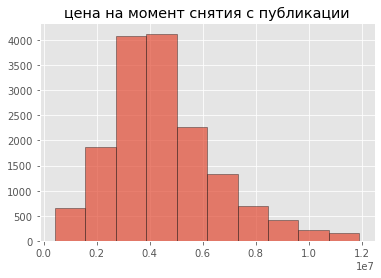

In [55]:
df_no_outliers['цена на момент снятия с публикации'].hist(edgecolor = 'black', alpha = .7)
plt.title('цена на момент снятия с публикации')
plt.show()

In [56]:
def _calculate_corr_matrix(df):
    df_num = df_no_outliers.select_dtypes('number')
    num_columns = df_num.columns
    df_corr = pd.DataFrame()
    for i in range(df_num.shape[1]):
        for j in range(i+1, df_num.shape[1]):
            c1, c2 = num_columns[i], num_columns[j]
            x1, x2 = df_num[c1], df_num[c2]
            corr = np.corrcoef(x1, x2)[0, 1]
            df_corr.loc[c1, c2] =  corr
            
    return df_corr    


In [57]:
corr_df = _calculate_corr_matrix(df)

In [58]:
to_use = ['цена на момент снятия с публикации', 'площадь квартиры в квадратных метрах (м²)',\
          'расстояние до центра города (м)', 'этаж', 'год публикации', 'месяц публикации',
          'день недели публикации']

In [59]:
final_corr = corr_df[to_use]

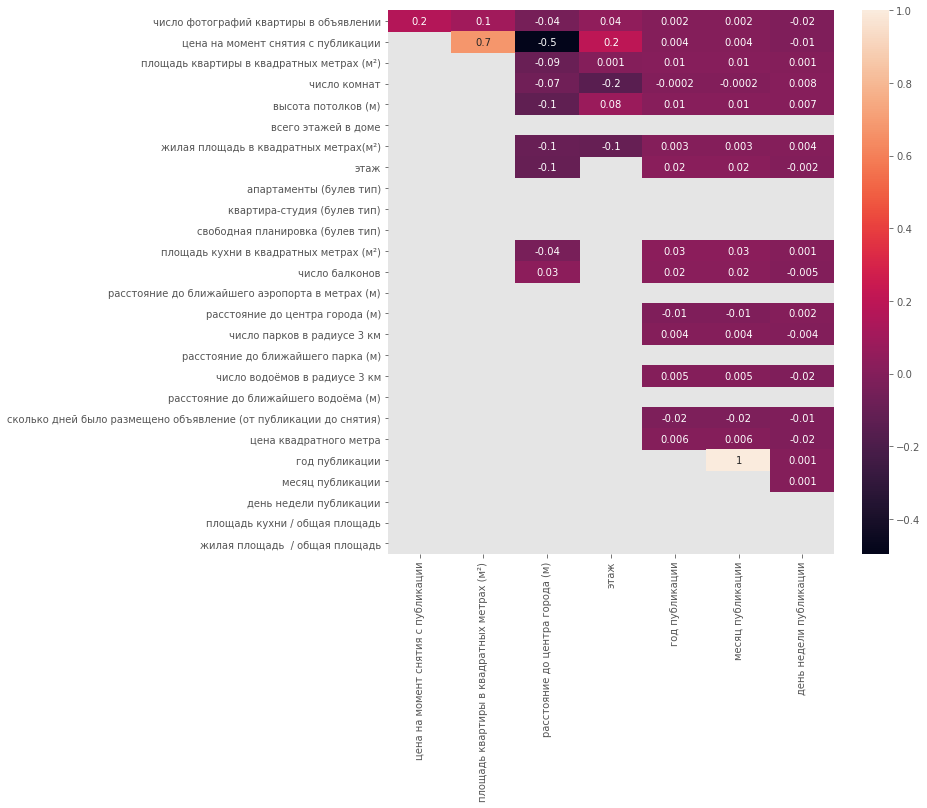

In [60]:
plt.figure(figsize = (10, 10))
sns.heatmap(final_corr,annot = True, fmt='.1g')
plt.show()

#### Шаг 4.5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
* самые дорогие: Санкт-Перебург, Парголово
* самые дешевые: Выборг, Гатчина


In [61]:
top10_sizes = df_no_outliers['название населённого пункта'].value_counts().head(10).index

_df_top10_sizes = df_no_outliers[df_no_outliers['название населённого пункта'].isin(top10_sizes)]
_df_top10_sizes['цена квадратного метра_log'] = _df_top10_sizes['цена квадратного метра'].apply(np.log1p)
order = _df_top10_sizes.groupby('название населённого пункта')\
                        ['цена квадратного метра_log'].median().sort_values(ascending = False).index

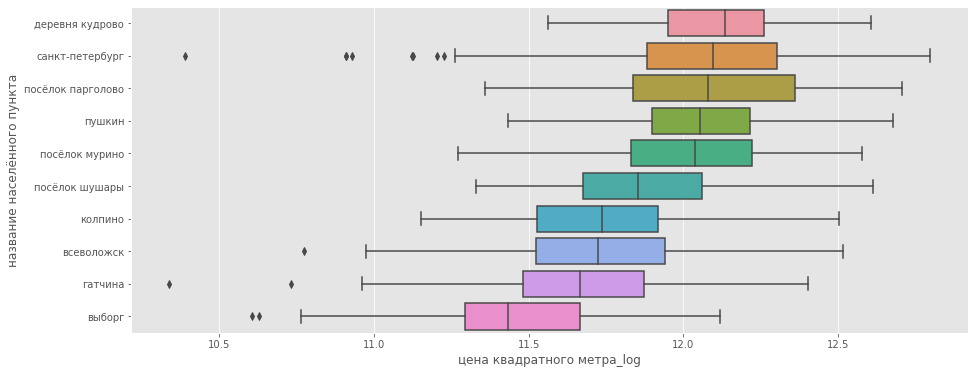

In [62]:
plt.figure(figsize = (15, 6))
sns.boxplot(data = _df_top10_sizes, y = 'название населённого пункта', x = 'цена квадратного метра_log', order = order)
plt.show()

#### Шаг 4.6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
* Центр Санкт-Петербурга находится в радиусе 4318 м

In [63]:
df_spb = df_no_outliers[df_no_outliers['название населённого пункта'] == 'санкт-петербург']

In [64]:
df_spb['цена 1 км до центра']  = df_spb['цена на момент снятия с публикации'] / (df_spb['расстояние до центра города (м)'] // 1e3)

In [65]:
print('Центр Санкт-Петербурга находится в радиусе {:.0f} м'.format(df_spb.loc[df_spb['цена 1 км до центра'] >= df_spb['цена 1 км до центра'].quantile(.95)]\
          ['расстояние до центра города (м)'].mean()))

Центр Санкт-Петербурга находится в радиусе 4322 м


#### Шаг 4.7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?
* площадь, цена, расстояние до центра- наиболее весомые факторы
* есть различия в этаже, но тут надо проверять гипотезы

In [66]:
df_spb_center = df_spb.loc[df_spb['цена 1 км до центра'] >= df_spb['цена 1 км до центра'].quantile(.95)]

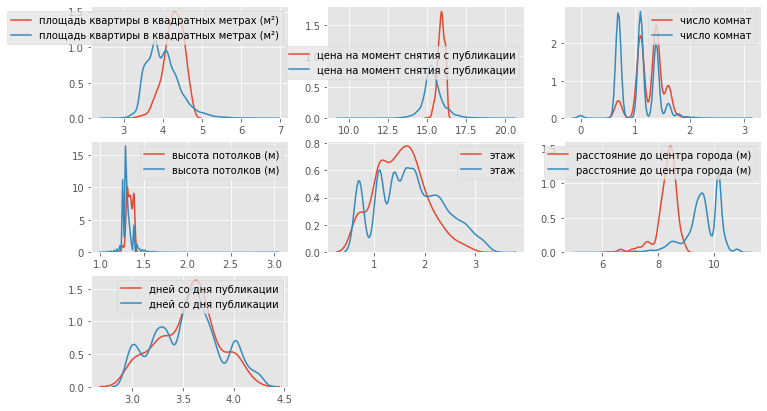

In [67]:
to_check = ['площадь квартиры в квадратных метрах (м²)', 'цена на момент снятия с публикации',\
            'число комнат', 'высота потолков (м)', 'этаж',\
            'расстояние до центра города (м)', 'дней со дня публикации']

df_others = df.drop(index = df_spb_center.index)
plt.figure(figsize = (12, 7))
for i, col in enumerate(to_check):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(df_spb_center[col].apply(np.log1p))
    sns.kdeplot(df_others[col].apply(np.log1p))    
    

In [68]:
corr_w_price = df_no_outliers.select_dtypes('number').drop('цена на момент снятия с публикации',1)\
                .corrwith(df_no_outliers['цена на момент снятия с публикации'])\
                .sort_values()

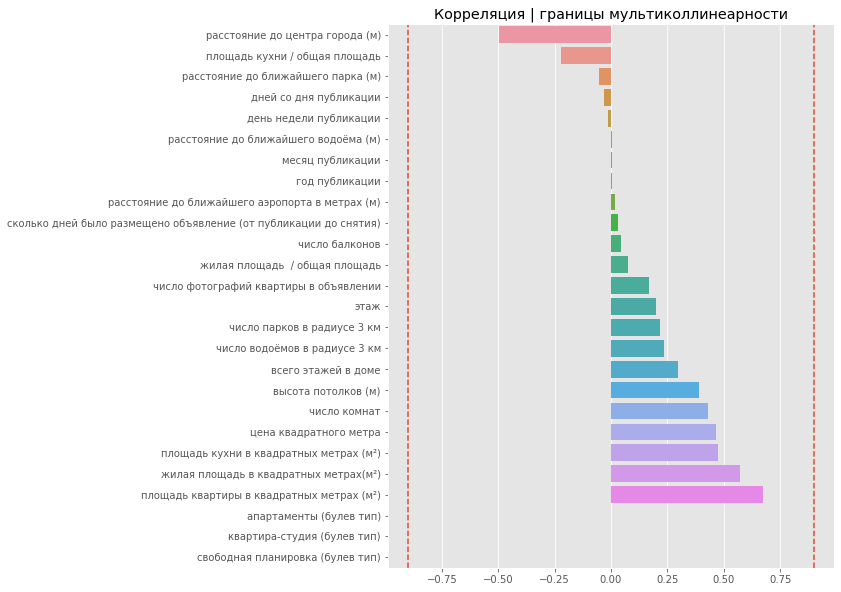

In [69]:
plt.figure(figsize = (8, 10))
sns.barplot(y = corr_w_price.index, x = corr_w_price.values, orient= 'h')
plt.axvline(-.9, linestyle = '--')
plt.axvline(.9, linestyle = '--')
plt.title('Корреляция | границы мультиколлинеарности')
plt.show()

#### Побъем цену на бины

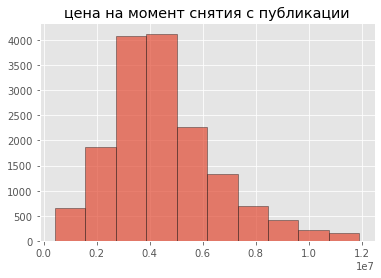

In [70]:
price = df_no_outliers['цена на момент снятия с публикации']
price.hist(edgecolor = 'black', alpha = .7)
plt.title('цена на момент снятия с публикации')
plt.show()

In [71]:
df_no_outliers['ценовая группа'] = price// 1e6

In [72]:
def _plot_kde_boxplots_by_groups(df_no_outliers, by, feat, figsize):
    
    y_name = feat
    x_name = by
    
    plt.figure(figsize = figsize)
    plt.subplot(3, 1, 1)
    df_no_outliers.groupby('ценовая группа')['число фотографий квартиры в объявлении'].mean().plot()
    plt.title('среднее {} по {}'.format(y_name, x_name))
    
    plt.subplot(3, 1, 2)
    
    sns.boxplot(x=x_name, y=y_name,
                data=df_no_outliers, palette="Set3", orient = 'v')    
    plt.title('{} по {}'.format(y_name, x_name))
    
    plt.subplot(3, 1, 3)
    for group in np.unique(df_no_outliers[by]):
        sns.kdeplot(df_no_outliers[df_no_outliers[by] == group][feat])
    plt.title('{} по {}'.format(y_name, x_name))
        

In [73]:
df_to_plot = df_no_outliers.select_dtypes('number').drop(['цена на момент снятия с публикации', 'ценовая группа'], 1)
to_plot = df_to_plot[df_to_plot.nunique()[df_to_plot.nunique() > 100].index].columns

ПЛОЩАДЬ КВАРТИРЫ В КВАДРАТНЫХ МЕТРАХ (М²)
------------------------------------------------------------------------------


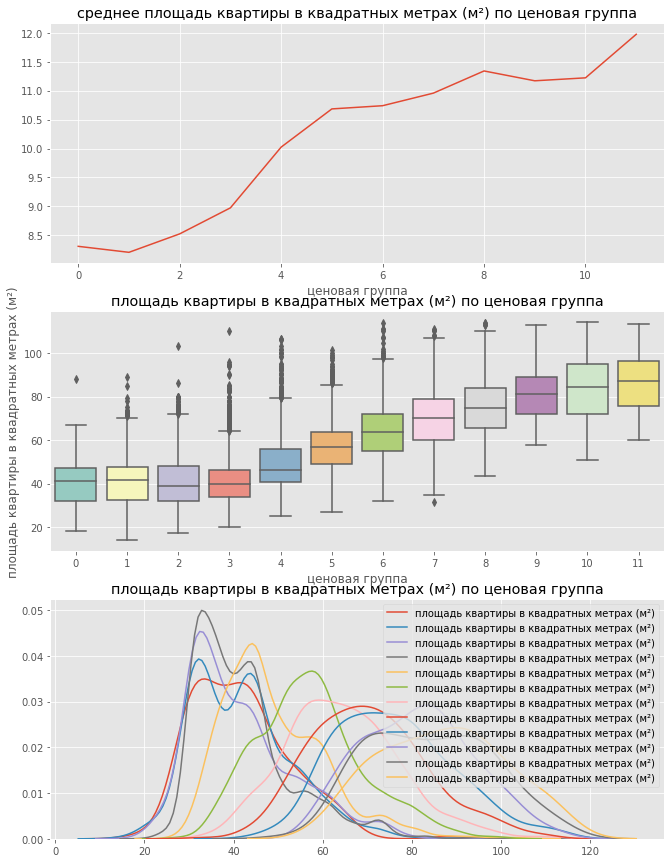

ВЫСОТА ПОТОЛКОВ (М)
------------------------------------------------------------------------------


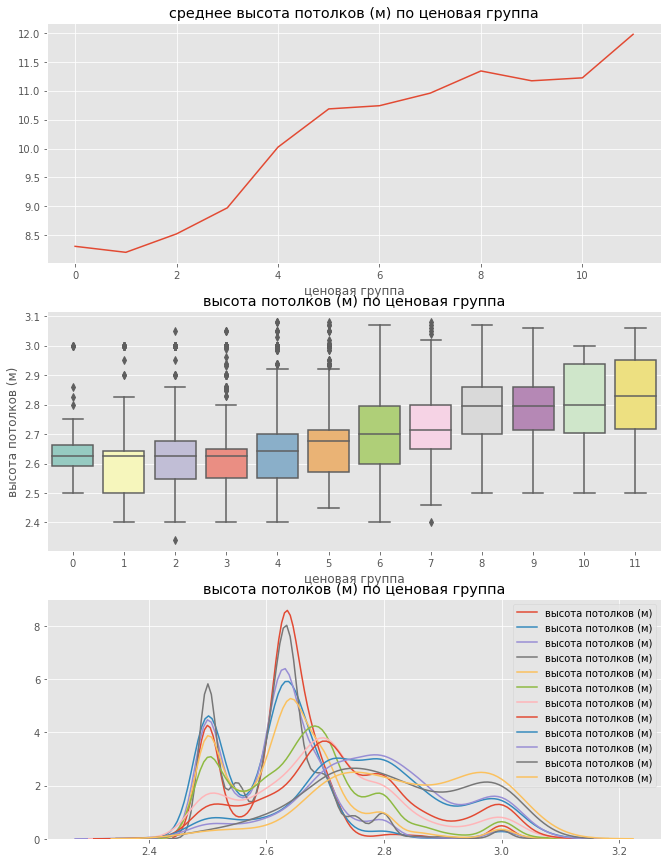

ЖИЛАЯ ПЛОЩАДЬ В КВАДРАТНЫХ МЕТРАХ(М²)
------------------------------------------------------------------------------


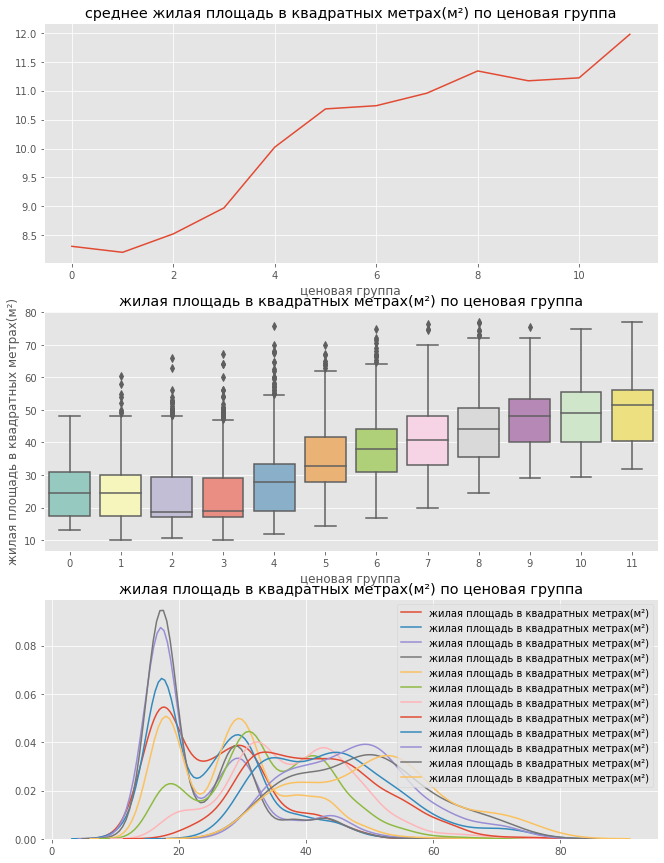

ПЛОЩАДЬ КУХНИ В КВАДРАТНЫХ МЕТРАХ (М²)
------------------------------------------------------------------------------


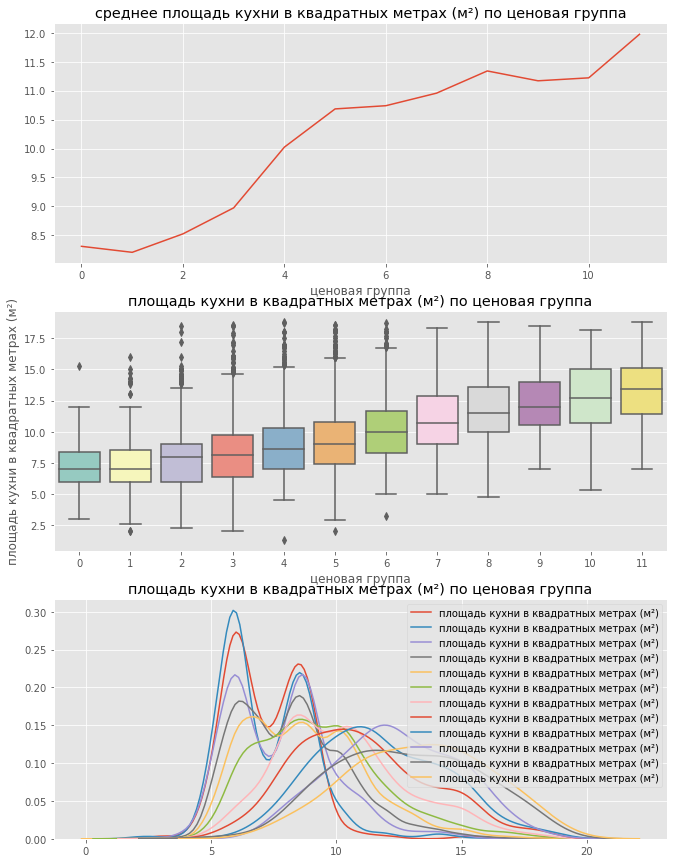

РАССТОЯНИЕ ДО БЛИЖАЙШЕГО АЭРОПОРТА В МЕТРАХ (М)
------------------------------------------------------------------------------


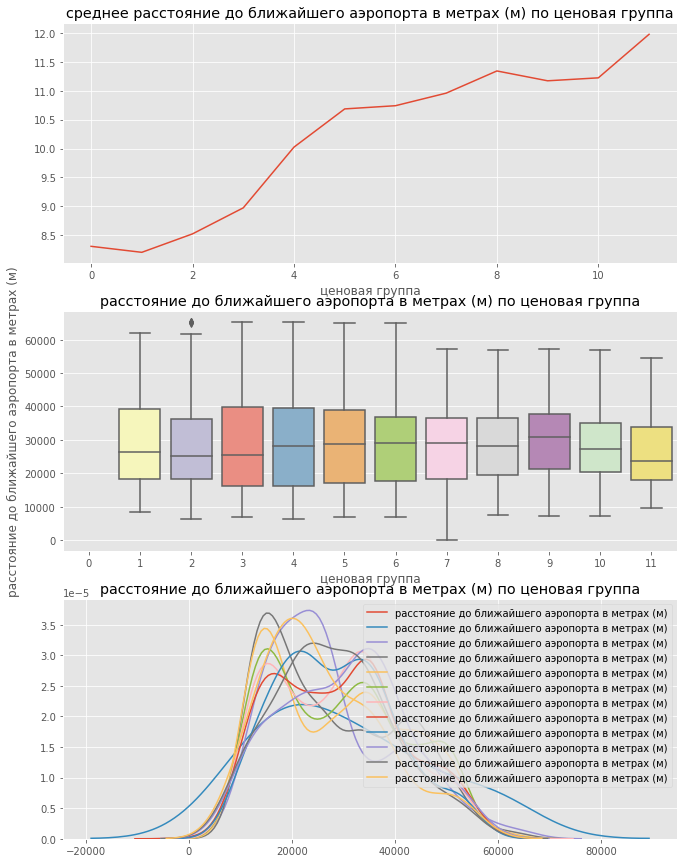

РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА (М)
------------------------------------------------------------------------------


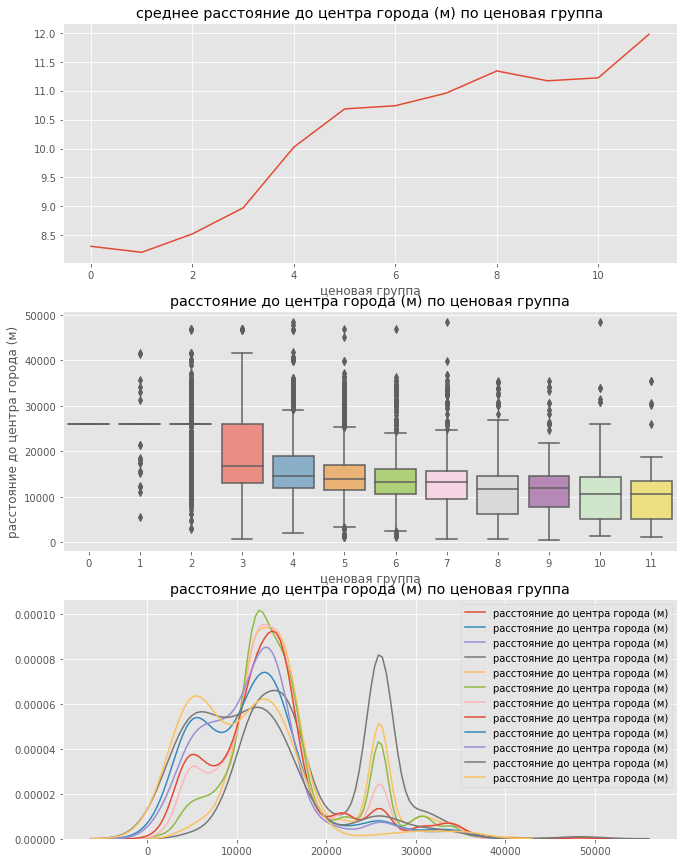

РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ПАРКА (М)
------------------------------------------------------------------------------


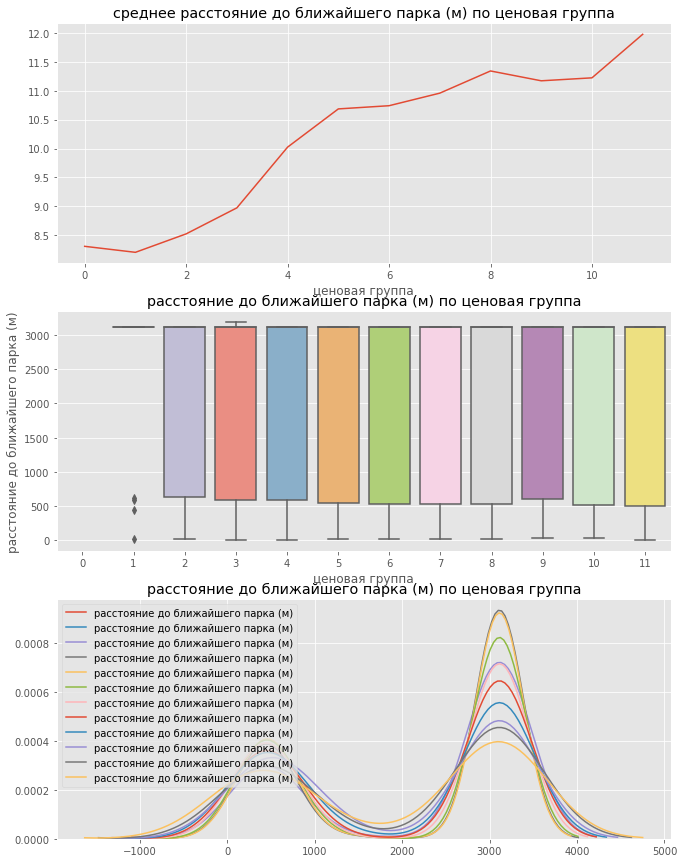

РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ВОДОЁМА (М)
------------------------------------------------------------------------------


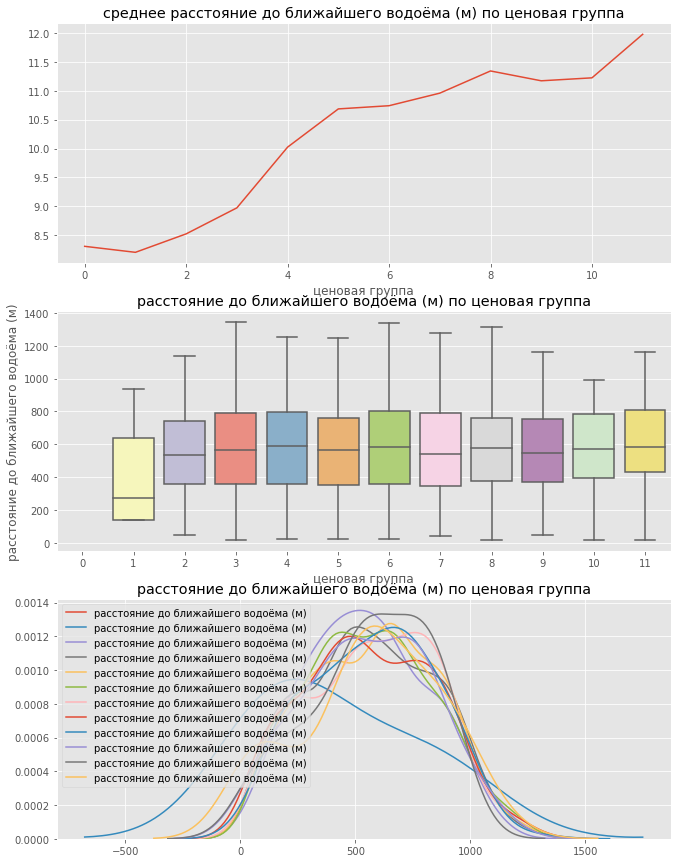

СКОЛЬКО ДНЕЙ БЫЛО РАЗМЕЩЕНО ОБЪЯВЛЕНИЕ (ОТ ПУБЛИКАЦИИ ДО СНЯТИЯ)
------------------------------------------------------------------------------


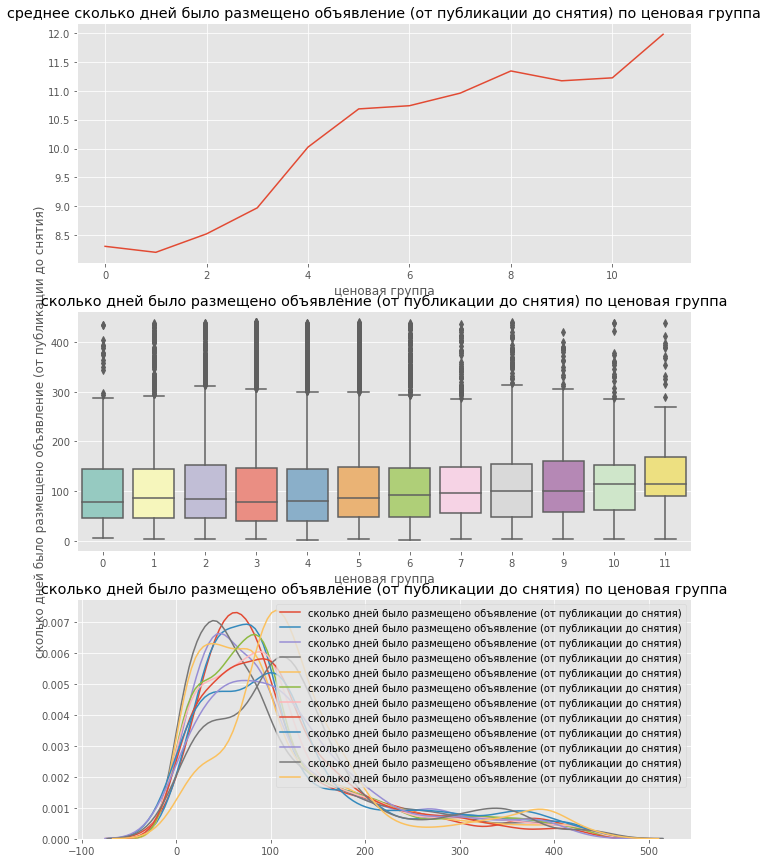

ЦЕНА КВАДРАТНОГО МЕТРА
------------------------------------------------------------------------------


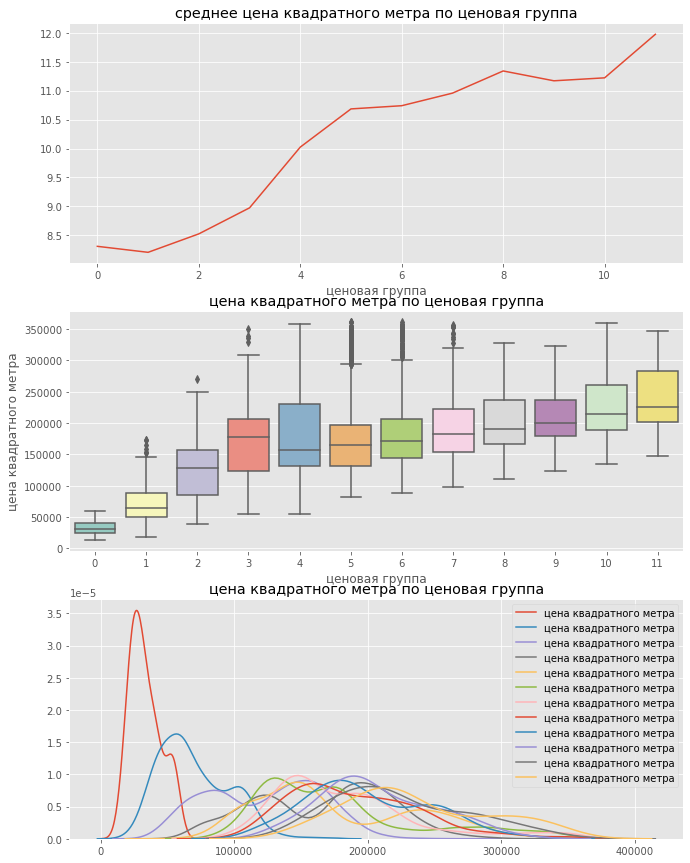

ПЛОЩАДЬ КУХНИ / ОБЩАЯ ПЛОЩАДЬ
------------------------------------------------------------------------------


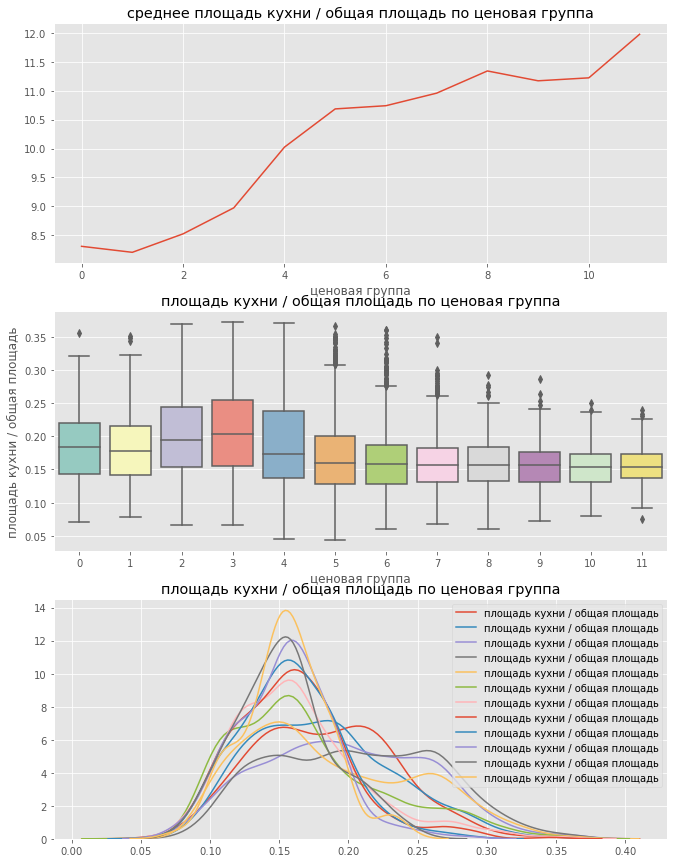

ЖИЛАЯ ПЛОЩАДЬ  / ОБЩАЯ ПЛОЩАДЬ
------------------------------------------------------------------------------


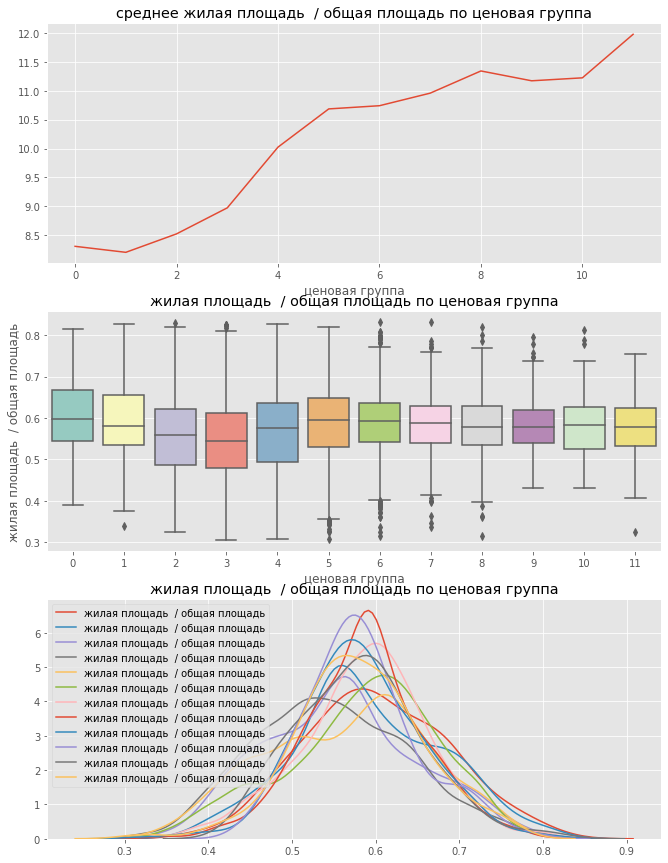

In [74]:
for col in to_plot:
    print(str.upper(col))
    _plot_kde_boxplots_by_groups(df_no_outliers,\
                             by='ценовая группа',\
                             feat = col,\
                             figsize = (11, 15))
    print('------------------------------------------------------------------------------')
    plt.show()

In [75]:
nuniques = df_no_outliers.nunique()
nuniques[nuniques==1].index

Index(['апартаменты (булев тип)', 'квартира-студия (булев тип)',
       'свободная планировка (булев тип)'],
      dtype='object')

In [76]:
# уникальные группы
unique_groups =np.unique(df_no_outliers['ценовая группа'])

In [77]:
means_by_group = df_no_outliers.groupby('ценовая группа')['цена на момент снятия с публикации'].agg({'mean','count'})

In [78]:
means_by_group = df_no_outliers.select_dtypes('number').groupby('ценовая группа').mean()
means_by_group = (means_by_group[means_by_group.nunique()[means_by_group.nunique() != 1].index]).round(2)\
                    .drop('цена на момент снятия с публикации', 1)
report_df = pd.concat([means_by_group[feat].agg({'min', 'max', 'mean'}).to_frame(feat).T for feat in means_by_group.columns])
order = ((report_df['max'] - report_df['min']) / report_df['mean']).sort_values(ascending = False).index
report_df = report_df.loc[order]
report_df.columns = ['минимум по группам', 'маскимум по группам', 'среднее по группам']

## Шаг 5. Вывод
#### _Целью проекта был анализ различных показателей, характеризующих жилье в городах России_
#### _Были представлены следующие показатели:_
* _airports_nearest — расстояние до ближайшего аэропорта в метрах (м)_
* _balcony — число балконов_
* _ceiling_height — высота потолков (м)_
* _cityCenters_nearest — расстояние до центра города (м)_
* _days_exposition — сколько дней было размещено объявление (от публикации до снятия)_
* _first_day_exposition — дата публикации_
* _floor — этаж_
* _floors_total — всего этажей в доме_
* _is_apartment — апартаменты (булев тип)_
* _kitchen_area — площадь кухни в квадратных метрах (м²)_
* _last_price — цена на момент снятия с публикации_
* _living_area — жилая площадь в квадратных метрах(м²)_
* _locality_name — название населённого пункта_
* _open_plan — свободная планировка (булев тип)_
* _parks_around3000 — число парков в радиусе 3 км_
* _parks_nearest — расстояние до ближайшего парка (м)_
* _ponds_around3000 — число водоёмов в радиусе 3 км_
* _ponds_nearest — расстояние до ближайшего водоёма (м)_
* _rooms — число комнат_
* _studio — квартира-студия (булев тип)_
* _total_area — площадь квартиры в квадратных метрах (м²)_
* _total_images — число фотографий квартиры в объявлении_

#### _В данных присутствовали некорректные значения, пропуски, выбросы._
* некорректные значения были исправлены(по мере возможности)
* пропуски были заполнены средними или медианными значениями показателя, сгруппированного по наиболее сильно коррелирующих с ним
* выбросы были отфильтрованы с помощью интеквартильного размаха

##### _Квартиры типа апартаменты (булев тип), квартира-студия (булев тип), свободная планировка (булев тип) являются ввыбросами, поэтому читывать данные характеристики не стоит_

##### _Размеры ценовых групп групп_

|группа|средняя цена|размер группы|
|------|------|------|
|1|773501|207|
|2|1562660|983|
|3|2562692|2048|
|4|3512191|3873|
|5|4462891|3472|
|6|5441198|2187|
|7|6457344|1268|
|8|7442517|765|
|9|8436823|464|
|10|9479247|264|
|11|10451566|167|
|12|11426508|116|

##### _Стаитсики по группам_

|наименование|минимум по группам|максимум по группам|среднее по группам|
|------|------|------|------|
|число водоёмов в радиусе 3 км|0.0|0.7|0.42|
|число парков в радиусе 3 км|0.0|0.56|0.35|
|расстояние до центра города (м)|10464.15|25955.8|16739.66|
|всего этажей в доме|3.97|13.59|10.61|
|этаж|2.61|7.0|5.45|
|жилая площадь в квадратных метрах(м²)|23.33|50.61|35.84|
|площадь квартиры в квадратных метрах (м²)|41.5|86.91|61.35|
|число балконов|0.28|0.59|0.48|
|площадь кухни в квадратных метрах (м²)|7.25|13.33|10.02|
|число комнат|1.51|2.78|2.2|
|число фотографий квартиры в объявлении|8.21|11.97|10.18|
|площадь кухни / общая площадь|0.15|0.2|0.17|
|расстояние до ближайшего водоёма (м)|423.8|580.53|552.71|
|расстояние до ближайшего парка (м)|1930.93|2515.42|2113.51|
|сколько дней было размещено объявление (от публикации до снятия)|107.52|138.21|117.79|
|день недели публикации|2.3|2.79|2.59|
|расстояние до ближайшего аэропорта в метрах (м)|26332.73|30356.67|28632.29|
|год публикации|6.03|6.72|6.39|
|месяц публикации|6.03|6.72|6.39|
|жилая площадь  / общая площадь|0.55|0.6|0.58|
|высота потолков (м)|2.61|2.83|2.7|
|дней со дня публикации|32.58|34.82|33.48|

##### _Самые весомы различия цен в: число водоёмов в радиусе 3 км, число парков в радиусе 3 км, расстояние доцентра города (м)_

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>
   
Кластеризация - это круто, но это не часть работы. 

</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера 2</h2>
   
Выводы еще стоит доработать. Опиши основные результаты, полученные в работе. Сделай акцент именно на них. Людей чаще всего интересуют именно выводы. Им неважно, с какими данными ты работал, а важно то, что ты получил своим исследованием. 

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера 3</h2>

Старайся больший акцент в выводах делать именно на полученных в работе результатах. Именно они и есть основной результат твоей работы. 

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 2</h2>
   
Работа стала лучше, молодец. Осталось еще несколько дополнить ее, тогда все будет просто отлично. Жду следующий вариант твоей работы :)

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 3</h2>

Помарки исправлены, и теперь работа выполнена хорошо. Ты здорово поработал, молодец. Успехов в дальнейших проектах :)

</div>
   